<br>
   Description: Perform Agglomerative clustering with ward linkage on Handwritten digits dataset<br>
   Author: Krutarth Trivedi,  MS Robotics'23, WPI | ktrivedi@wpi.edu<br>
   OS: ubuntu 20.04 LTS<br>
   Software/Tools/Language: Python, Visual Studio Code</br>
   <br> Later imported to Jupyter Notebook<br>

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, manifold
import scipy.cluster.hierarchy as shc
import numpy as np
from scipy import ndimage

In [12]:
def performance_measure(y_set, y_pred):
    
    plot = metrics.ConfusionMatrixDisplay.from_predictions(y_set, y_pred)
    plot.figure_.suptitle("Confusion Matrix")
    plt.show()
    print(f"Confusion matrix:\n{plot.confusion_matrix}")
    FM_index = metrics.fowlkes_mallows_score(y_set, y_pred)
    print("Fowlkws - Mallows Index: ", FM_index)

In [13]:
def plot_print(X, Y, title):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure(figsize=(6, 4))
    for i in range(X.shape[0]):
        plt.text(
            X[i, 0],
            X[i, 1],
            str(Y[i]),
            color=plt.cm.nipy_spectral(model.labels_[i] / 10.0),
            fontdict={"weight": "bold", "size": 9},
        )
    plt.xticks([])
    plt.yticks([])
    plt.title(title,size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [14]:
n_cluster = 10
x, y = load_digits(return_X_y=True)
n_samples, n_features = x.shape
np.random.seed(0)

In [15]:
shift = lambda k: ndimage.shift(
        k.reshape((8, 8)), 0.3 * np.random.normal(size=2), mode="constant"
    ).ravel()
x = np.concatenate([x, np.apply_along_axis(shift, 1, x)])
y = np.concatenate([y, y], axis=0)
X_spectral = manifold.SpectralEmbedding(n_components=2).fit_transform(x)


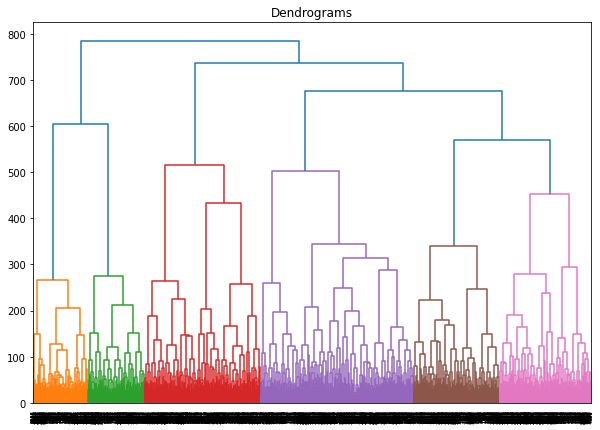

In [16]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(x, method= 'ward'))
plt.show()

In [17]:
model = AgglomerativeClustering(n_clusters = n_cluster, linkage = 'ward')

In [18]:
prediction = model.fit_predict(X_spectral)

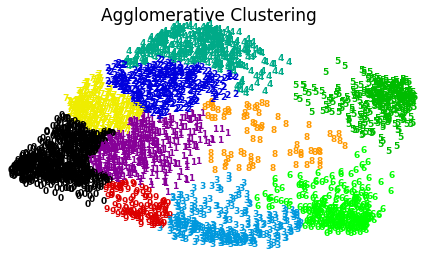

In [19]:
plot_print(X_spectral, prediction,'Agglomerative Clustering')

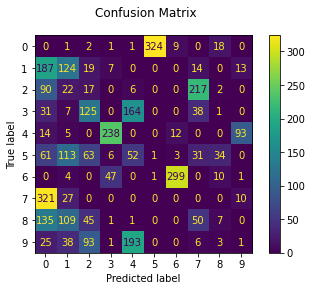

Confusion matrix:
[[  0   1   2   1   1 324   9   0  18   0]
 [187 124  19   7   0   0   0  14   0  13]
 [ 90  22  17   0   6   0   0 217   2   0]
 [ 31   7 125   0 164   0   0  38   1   0]
 [ 14   5   0 238   0   0  12   0   0  93]
 [ 61 113  63   6  52   1   3  31  34   0]
 [  0   4   0  47   0   1 299   0  10   1]
 [321  27   0   0   0   0   0   0   0  10]
 [135 109  45   1   1   0   0  50   7   0]
 [ 25  38  93   1 193   0   0   6   3   1]]
Fowlkws - Mallows Index:  0.42116800053227904


In [20]:
performance_measure(y, prediction)